# Noisy data notebook

We want to compare our 3 K-means algorithms (standard, K-means++, PCA-guided) on noisy data.

First we will test them on synthetic noised data (GMM), then on real data().

We will measure inertia loss of each clustering, as well as the accuracy against the ground truth (mesaured by the Rand index : https://en.wikipedia.org/wiki/Rand_index).

## Synthetic data

In [12]:
# src not in the same folder
import os
import sys
os.path.join(os.path.dirname('src'), '../')
sys.path.append(os.path.join(os.path.dirname('src'), '../'))

In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from K_means import *
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [20]:
# generate synthetic data

# parameters
n_samples = 300
n_features = 10
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

df = pd.DataFrame(X)
df['True_Label'] = y

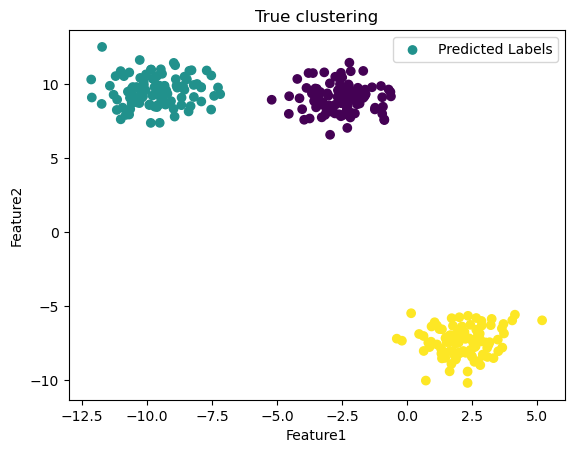

In [21]:
# visualize true clustering (we project on the first two dimensions)
plt.scatter(df[0], df[1], c=df['True_Label'], cmap='viridis', label='Predicted Labels')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('True clustering')
plt.legend()
plt.show()

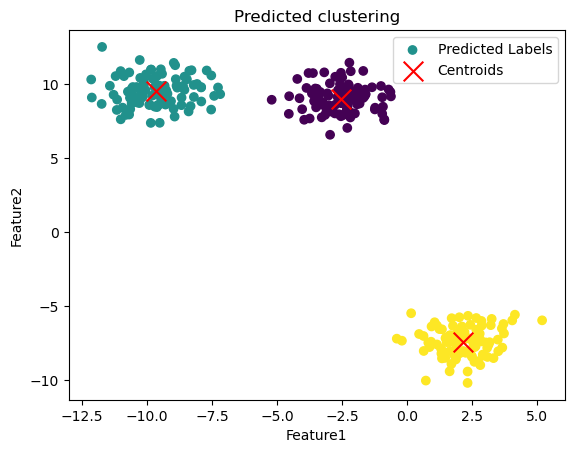

In [4]:
# standard K-means clustering
kmeans = generalized_Kmeans(k=n_clusters, init='forgy', epochs=100)
kmeans.fit(df[range(n_features)].values)
df['Predicted_Label'] = kmeans.predict(df[range(n_features)].values)

# predicted clustering visualization
plt.scatter(df[0], df[1], c=df['Predicted_Label'], cmap='viridis', label='Predicted Labels')
plt.scatter(kmeans.centers_[:, 0], kmeans.centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Predicted clustering')
plt.legend()
plt.show()

In [5]:
# define Rand index for similarity between clusters

from sklearn.metrics import rand_score

In [22]:
# define noise level
noise_level = 5


# initial synthetic data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# add homoscedatic noise
X_noisy_homoscedastic = X + noise_level * np.random.randn(n_samples, n_features)

# normalize data
X_centered = X - X.mean(axis=0)

# add heteroskedastic noise (correlated to the value)
X_noisy_heteroscedastic = X +  np.random.randn(n_samples, n_features) * X

### Standard K-means

In [23]:
# stock loss
loss_kmeans = []

# stock accuracy 
accuracy_kmeans = []

# std K-means
kmeans_original = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
kmeans_original.fit(X)
y_original = kmeans_original.predict(X)


# stock loss
loss_kmeans.append(kmeans_original.loss_)
#stock accuracy
accuracy_kmeans.append(rand_score(y, y_original))

# std K-means on homoscedastic noised data
kmeans_homoscedastic = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
kmeans_homoscedastic.fit(X_noisy_homoscedastic)
y_homoscedastic = kmeans_homoscedastic.predict(X_noisy_homoscedastic)

# stock loss
loss_kmeans.append(kmeans_homoscedastic.loss_)
#stock accuracy
accuracy_kmeans.append(rand_score(y, y_homoscedastic))

# std K-means on heteroscedatic noised data
kmeans_heteroscedastic = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
kmeans_heteroscedastic.fit(X_noisy_heteroscedastic)
y_heteroscedastic = kmeans_heteroscedastic.predict(X_noisy_heteroscedastic)

# stock loss
loss_kmeans.append(kmeans_heteroscedastic.loss_)
#stock accuracy
accuracy_kmeans.append(rand_score(y, y_heteroscedastic))

### K-means++

In [24]:
# stock loss
loss_kmeans_pp = []
accuracy_kmeans_pp = []

# K-means++
kmeans_pp = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
kmeans_pp.fit(X)
y_pp_original = kmeans_pp.predict(X)

# stock loss
loss_kmeans_pp.append(kmeans_pp.loss_)
#stock accuracy
accuracy_kmeans_pp.append(rand_score(y, y_pp_original))

# K-means++ on homoscedastic noised data
kmeans_pp_homoscedastic = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
kmeans_pp_homoscedastic.fit(X_noisy_homoscedastic)
y_pp_homoscedastic = kmeans_pp_homoscedastic.predict(X_noisy_homoscedastic)

# stock loss
loss_kmeans_pp.append(kmeans_pp_homoscedastic.loss_)
#stock accuracy
accuracy_kmeans_pp.append(rand_score(y, y_pp_homoscedastic))

# K-means++ on heteroscedatic noised data
kmeans_pp_heteroscedastic = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
kmeans_pp_heteroscedastic.fit(X_noisy_heteroscedastic)
y_pp_heteroscedastic = kmeans_pp_heteroscedastic.predict(X_noisy_heteroscedastic)

# stock loss
loss_kmeans_pp.append(kmeans_pp_heteroscedastic.loss_)
#stock accuracy
accuracy_kmeans_pp.append(rand_score(y, y_pp_heteroscedastic))

### PCA guided K-means

In [25]:
# stock loss
loss_kmeans_pca = []
accuracy_kmeans_pca = []

# K-means++
kmeans_pca = generalized_Kmeans(k=n_clusters, init='guided_PCA', random_seed=42)
kmeans_pca.fit(X)
y_pca_original = kmeans_pca.predict(X)

# stock loss
loss_kmeans_pca.append(kmeans_pca.loss_)
#stock accuracy
accuracy_kmeans_pca.append(rand_score(y, y_pca_original))

# K-means++ on homoscedastic noised data
kmeans_pca_homoscedastic = generalized_Kmeans(k=n_clusters, init='guided_PCA',  random_seed=42)
kmeans_pca_homoscedastic.fit(X_noisy_homoscedastic)
y_pca_homoscedastic = kmeans_pca_homoscedastic.predict(X_noisy_homoscedastic)

# stock loss
loss_kmeans_pca.append(kmeans_pca_homoscedastic.loss_)
#stock accuracy
accuracy_kmeans_pca.append(rand_score(y, y_pca_homoscedastic))

# K-means++ on heteroscedatic noised data
kmeans_pca_heteroscedastic = generalized_Kmeans(k=n_clusters, init='guided_PCA', random_seed=42)
kmeans_pca_heteroscedastic.fit(X_noisy_heteroscedastic)
y_pca_heteroscedastic = kmeans_pca_heteroscedastic.predict(X_noisy_heteroscedastic)

# stock loss
loss_kmeans_pca.append(kmeans_pca_heteroscedastic.loss_)
#stock accuracy
accuracy_kmeans_pca.append(rand_score(y, y_pca_heteroscedastic))

### Visualizing results

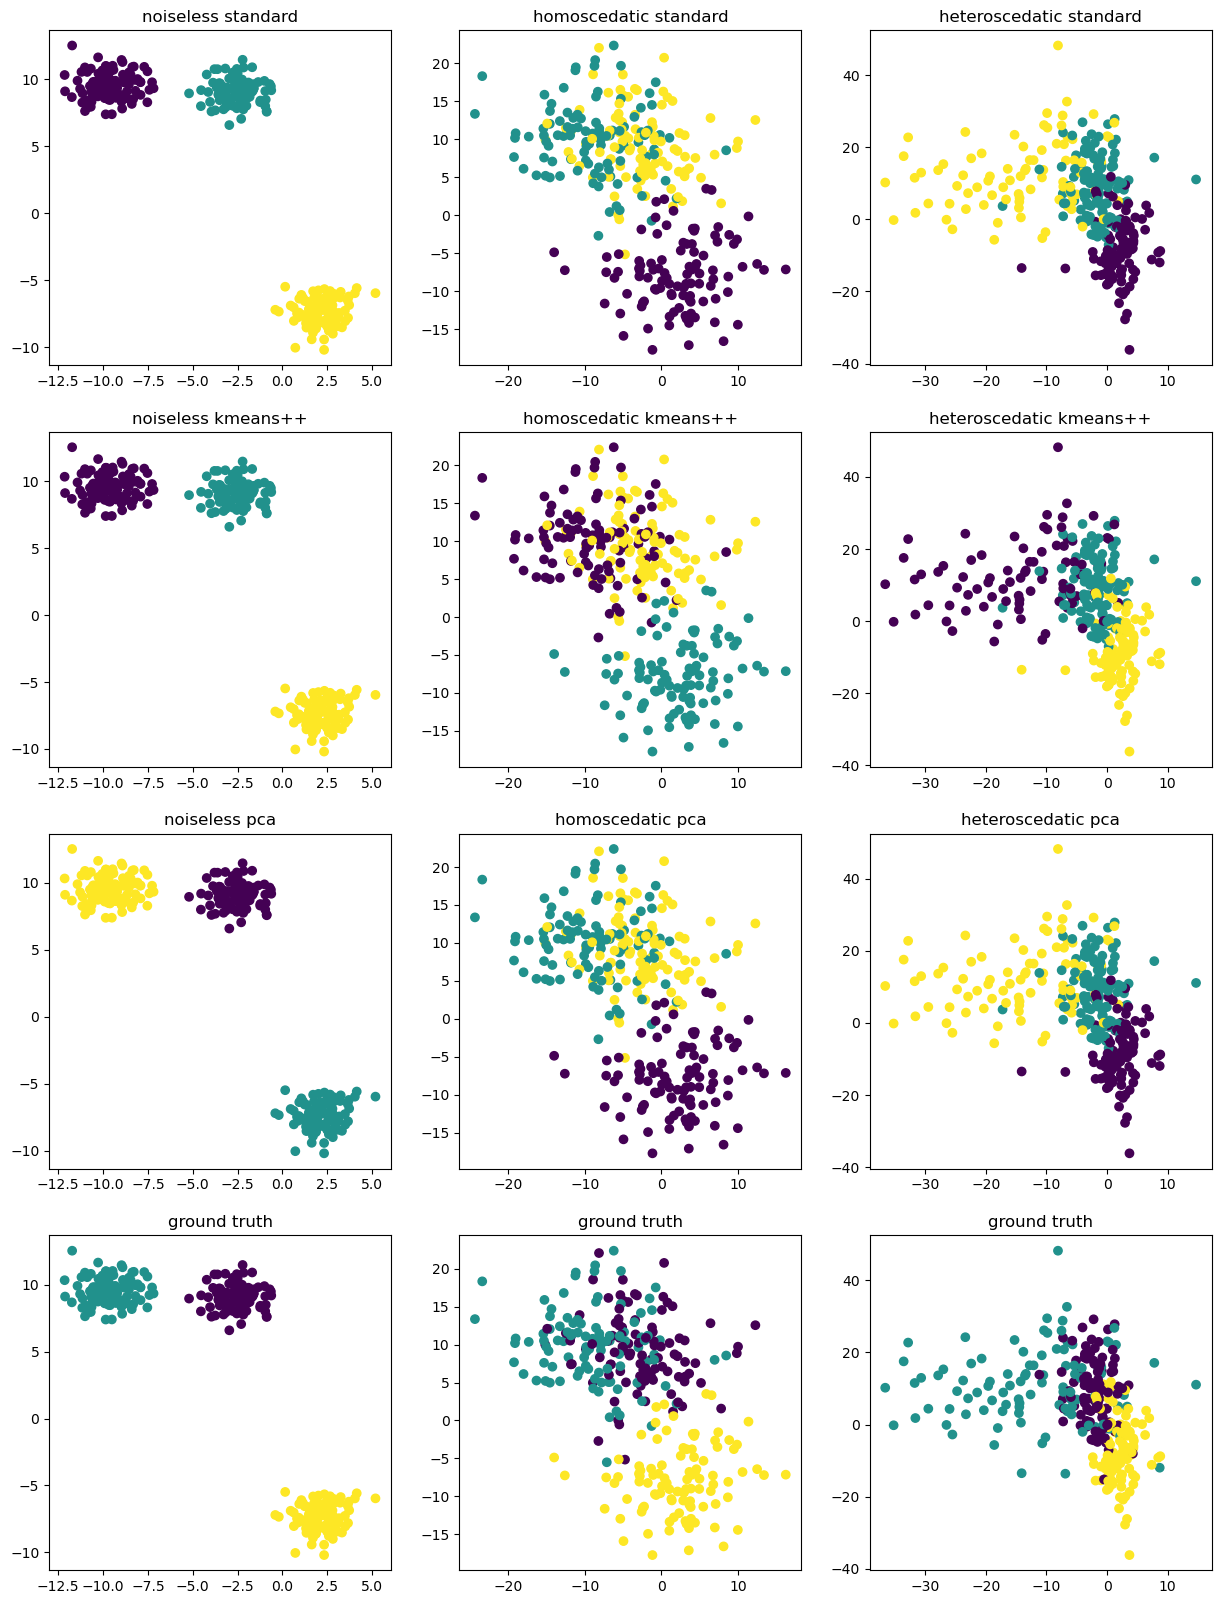

In [26]:
# print clustering
fig = plt.figure(figsize=(15, 20))
axes = fig.subplots(nrows=4, ncols=3)

ax=axes[0,0]
ax.scatter(X[:, 0], X[:, 1], c=y_original, cmap='viridis')
ax.set_title('noiseless standard')

ax=axes[0,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y_homoscedastic, cmap='viridis')
ax.set_title('homoscedatic standard')

ax=axes[0,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y_heteroscedastic, cmap='viridis')
ax.set_title('heteroscedatic standard')

ax=axes[1,0]
ax.scatter(X[:, 0], X[:, 1], c=y_pp_original, cmap='viridis')
ax.set_title('noiseless kmeans++')

ax=axes[1,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y_pp_homoscedastic, cmap='viridis')
ax.set_title('homoscedatic kmeans++')

ax=axes[1,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y_pp_heteroscedastic, cmap='viridis')
ax.set_title('heteroscedatic kmeans++')

ax=axes[2,0]
ax.scatter(X[:, 0], X[:, 1], c=y_pca_original, cmap='viridis')
ax.set_title('noiseless pca')

ax=axes[2,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y_pca_homoscedastic, cmap='viridis')
ax.set_title('homoscedatic pca')

ax=axes[2,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y_pca_heteroscedastic, cmap='viridis')
ax.set_title('heteroscedatic pca')

ax=axes[3,0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax.set_title('ground truth')

ax=axes[3,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y, cmap='viridis')
ax.set_title('ground truth')

ax=axes[3,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y, cmap='viridis')
ax.set_title('ground truth')

plt.show()

### Compare loss and accuracy

In [27]:
# print loss
print(f'loss of standard k-means:', loss_kmeans)

# print accuracy
print(f'accuracy of standard k-means:', accuracy_kmeans, '\n')

# print loss
print(f'loss of k-means++:', loss_kmeans_pp)

# print accuracy
print(f'accuracy of k-means++:', accuracy_kmeans_pp, '\n')

# print loss
print(f'loss of pca-guided k-means:', loss_kmeans_pca)

# print accuracy
print(f'accuracy of pca-guided k-means:', accuracy_kmeans_pca, '\n')

loss of standard k-means: [2909.623868853904, 74920.52932149895, 104881.45330647766]
accuracy of standard k-means: [1.0, 0.9416499442586399, 0.9032998885172798] 

loss of k-means++: [2909.623868853904, 74920.52932149895, 104887.59065691997]
accuracy of k-means++: [1.0, 0.9416499442586399, 0.8994871794871795] 

loss of pca-guided k-means: [2909.6238688539042, 74921.35116476988, 104881.45330647766]
accuracy of pca-guided k-means: [1.0, 0.9455295429208472, 0.9032998885172798] 



## Real data



In [28]:
# load iris data set

from sklearn import datasets

iris = datasets.load_iris()

data = iris.data + np.random.normal(loc= 0., scale= 1., size = iris.data.shape)
target = iris.target

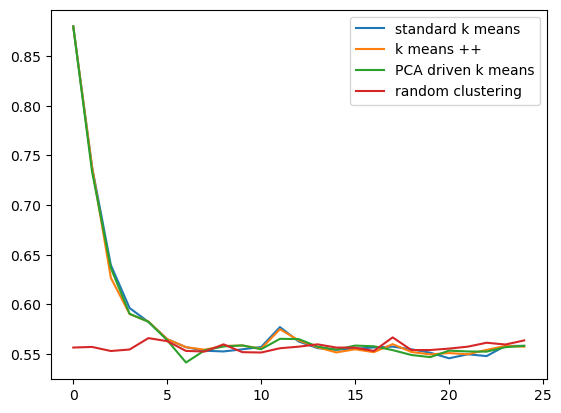

In [29]:
noise = 1.

# stock accuracies
accuracy_kmeans = []
accuracy_kmeans_pp = []
accuracy_kmeans_pca =[]

random = []
size =[]

# loop for incresaing noise
for i in range(25):

    data = iris.data + np.random.normal(loc= 0., scale= i * noise , size = iris.data.shape)

    # standard
    kmeans_iris= generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
    kmeans_iris.fit(data)
    y_kmeans = kmeans_iris.predict(data)
    # accuracy
    accuracy_kmeans.append(rand_score(target, y_kmeans))

    # kmeans++
    kmeans_pp_iris = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
    kmeans_pp_iris.fit(data)
    y_kmeans_pp = kmeans_pp_iris.predict(data)
    # accuracy
    accuracy_kmeans_pp.append(rand_score(target, y_kmeans_pp))

    # pca guided k means
    kmeans_pca_iris = generalized_Kmeans(k=n_clusters, init='guided_PCA', random_seed=42)
    kmeans_pca_iris.fit(data)
    y_kmeans_pca = kmeans_pca_iris.predict(data)
    # accuracy
    accuracy_kmeans_pca.append(rand_score(target, y_kmeans_pca))

    # random clustering for comparison
    random.append(rand_score(target, np.random.randint(low=0, high = 3, size = target.shape[0])))

    size.append(i)


plt.plot(size, accuracy_kmeans, label = 'standard k means')
plt.plot(size, accuracy_kmeans_pp, label = 'k means ++')
plt.plot(size, accuracy_kmeans_pca, label = 'PCA driven k means')

plt.plot(size, random, label = 'random clustering')

plt.legend()
plt.show()